# Product Classification
Basic product classification based on dataset produced by Product_Classification_Exploration.



## Classification
En considèrant que des champs famille pourraient être manquant, on va essayer le determiner la famille sur une base de la description du produit.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
file_name = './data_test/dim_product_clean.csv'
df = pd.read_csv(file_name)
df.head()

,PRODUIT_REFERENCE,EAN,vp_libelle,nomenclature_produit,nomenclature_famille,nomenclature_sous_famille,vp_marque_libelle,LOCAL_DESCRIPTION,LOCAL_CARACTERISTIQUE,LOCAL_COMPLEMENTDESCRIPTION,...,LOCAL_PRIX_VP,local_date_debut_ref,local_date_fin,vp_id,qte_vendu,DESCRIPTION,marque,discount,Marque,famille_code
0,005D Noir Ct Orange pop/Noir Ct Rose fuchsi,a3610860705099,2 boxers mix colors noir,"LINGERIE, HOMEWEAR ET BAIN",Lingerie,Bas lingerie,"canat(regular),comme ca des halles(regular),di...",2 boxers. <br> Taille élastique avec lettrage....,"<b>Coloris</b> : noir, fuchsia et orange<br> <...",NaN,...,5.5,2018-04-28 08:00:00.000,2018-05-07 08:00:00.000,48437,85.0,2 boxers taille élastique lettrage fond doublé...,canat,0.750000,dim,0
1,01MX Gris foncé vert foncé,"3610860609564,3610860609717,3610860609861",2 boxers 3d flex vert sapin gris,"LINGERIE, HOMEWEAR ET BAIN",Lingerie,Bas lingerie,"canat(regular),comme ca des halles(regular),di...",2 boxers.<br>Taille élastique avec lettrage et...,"<b>Coloris</b> : vert sapin, gris, corail et b...",NaN,...,10.5,2018-04-28 08:00:00.000,2018-05-07 08:00:00.000,48437,1.0,2 boxers taille élastique lettrage rayures dou...,canat,0.596154,dim,0
2,01N1 Bleu nuit gris ardoise,"3610860611598,3610860611710",2 boxers 3d flex air gris bleu marine,"LINGERIE, HOMEWEAR ET BAIN",Lingerie,Bas lingerie,"canat(regular),comme ca des halles(regular),di...",2 boxers.<br>Surpiqûres contrastantes.<br>Empi...,"<b>Coloris</b> : gris, bleu marine, turquoise ...",NaN,...,13.5,2018-04-28 08:00:00.000,2018-05-07 08:00:00.000,48437,2.0,2 boxers surpiqûres contrastantes empiècements...,canat,0.500000,dim,0
3,02CW Gris foncé/vert amande/bleu ardoise,"3610860732088,3610860732118,3610860732149,3610...",3 boxers color full bleu roi gris vert,"LINGERIE, HOMEWEAR ET BAIN",Lingerie,Bas lingerie,"canat(regular),comme ca des halles(regular),di...",3 boxers.<br>Taille élastique avec lettrage.<b...,"<b>Coloris</b> : bleu roi, gris et vert<br><b>...",NaN,...,12.0,2018-04-28 08:00:00.000,2018-05-07 08:00:00.000,48437,1.0,3 boxers taille élastique lettrage devant doub...,canat,0.600000,dim,0
4,07689 9B2-MARINE,"3131681608876,3131681608883,3131681608890,3131...",shorty caprice bleu marine,"LINGERIE, HOMEWEAR ET BAIN",Lingerie,Bas lingerie,"canat(regular),comme ca des halles(regular),di...","Shorty à rayures.<br>Nud satiné, tulle plumet...",<b>Coloris</b> : bleu marine et blanc <br><b>M...,NaN,...,4.2,2018-04-28 08:00:00.000,2018-05-07 08:00:00.000,48437,1.0,shorty rayures ud satiné tulle plumetis dentel...,canat,0.752941,dim,0


In [3]:
df.shape

(824, 32)

In [4]:
#Familles représentées
df['nomenclature_famille'].value_counts()

Lingerie                        509
Homewear                        155
Chaussettes, Collants et Bas     92
Spécial bébé                     68
Name: nomenclature_famille, dtype: int64

In [5]:
#sous forme de code
df['famille_code'].value_counts()

0    509
1    155
2     92
3     68
Name: famille_code, dtype: int64

## Préparation pour la classification
On veut prédire la famille (i.e son code) à partir de la description.

In [6]:
X = list(df['DESCRIPTION'])
X[:5]

['2 boxers taille élastique lettrage fond doublé marque dim coloris noir fuchsia orange matière 96 coton 4 élasthanne entretien lavage 40 cnan',
 '2 boxers taille élastique lettrage rayures doublé devant marque dim coloris vert sapin gris corail blanc matière 89 coton 11 élasthanne entretien lavage 40 cnan',
 '2 boxers surpiqûres contrastantes empiècements respirants devant dos taille élastique lettrage rayures devant doublé marque dim coloris gris bleu marine turquoise blanc matière 89 coton 11 élasthanne entretien lavage 40 cnan',
 '3 boxers taille élastique lettrage devant doublé marque dim coloris bleu roi gris vert matière 96 coton 4 élasthanne entretien lavage 40 cnan',
 'shorty rayures ud satiné tulle plumetis dentelle devant découpe goutte ud satiné dos taille élastique fond doublé marque variance coloris bleu marine blanc matière 71 polyamide 19 élasthanne 10 coton entretien lavage 30 cnan']

In [7]:
familles = ['Lingerie', 'Homewear', 'Chaussettes, Collants et Bas', 'Spécial bébé']
y = list(df['famille_code'])
y[:5]

[0, 0, 0, 0, 0]

In [8]:
#Split dataset into train/test data
# Keep only 20 for testing because we have a limited dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=20)
y_test

[1, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 0, 0, 3, 1, 0, 0, 0]

# Build a classification model

In [9]:
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True,
                             norm='l2', use_idf=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(804, 926)

In [10]:
#sample of words used by the vectorizer
import random
random.seed(0)
random.sample(vectorizer.get_feature_names(),20)

['ultraplat',
 'galbe',
 'shorty',
 'écru',
 'hiptser',
 '47',
 'corps',
 'maintiennent',
 'limitant',
 'grille_gerbe',
 'spécifique',
 'transparent',
 'droite',
 'lettrage',
 'flash',
 'nuit',
 'élastanne',
 'chien',
 'légère',
 'avengers']

In [11]:
# Try SVM with elasticnet (i.e mix of l1 & l2 penalty)
from sklearn.linear_model import SGDClassifier
mloss = 'hinge'
clf = SGDClassifier(loss=mloss, penalty='elasticnet',
                    alpha=1e-4, random_state=0,
                    max_iter=50, tol=None)
clf.fit(X_train_tfidf, y_train)

SGDClassifier(max_iter=50, penalty='elasticnet', random_state=0, tol=None)

In [12]:
print(f'Model score (on train_data): {clf.score(X_train_tfidf, y_train)}')

Model score (on train_data): 1.0


In [13]:
X_test_tfidf = vectorizer.transform(X_test)
print(f'Model score (on test_data): {clf.score(X_test_tfidf, y_test)}')

Model score (on test_data): 1.0


In [14]:
predicted = clf.predict(X_test_tfidf)
predicted

array([1, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 0, 0, 3, 1, 0, 0, 0])

## Explanations with SHAP


In [15]:
import shap
shap.initjs()
shap.__version__

'0.37.0'

In [16]:
#Use base explainer with auto algo selection
#explainer = shap.Explainer(clf, shap.sample(X_train_tfidf,100), algorithm='auto')
explainer = shap.Explainer(clf, X_train_tfidf, algorithm='auto')
type(explainer)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


shap.explainers._linear.Linear

In [17]:
#Because we are using linear explainer, SHAP expected_value seems to be in the log-odds space 
# (see: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html)
for i in range(len(explainer.expected_value)):
    print(f"Expected value for class {i}: {explainer.expected_value[i]:.3}")

Expected value for class 0: 0.457
Expected value for class 1: -0.83
Expected value for class 2: -1.08
Expected value for class 3: -1.18


In [18]:
#Explanation for first example (identity scale)
i = 0
X_test_array = X_test_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)

# For the predicted class
c = predicted[i]
print(f'Explanations for product {i} with description:\n \"{X_test[i]}\"\n predicted class {c} ({familles[c]}):')

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="identity", feature_names=vectorizer.get_feature_names())

Explanations for product 0 with description:
 "pyjama mario comprenant t-shirt manches longues col rond pantalon taille élastique coloris gris bleu marine bleu blanc rouge orange marron vert matière 100 coton entretien lavage 30 cnan"
 predicted class 1 (Homewear):


In [21]:
#logit scale (better to show a probability between 0 and 1)
shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

In [22]:
#Why not another c class
c = 0
print(f"Explanations for product {i} with description:\n {X_test[i]}\n Why not predicted class {c} ({familles[c]}):")

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

Explanations for product 0 with description:
 pyjama mario comprenant t-shirt manches longues col rond pantalon taille élastique coloris gris bleu marine bleu blanc rouge orange marron vert matière 100 coton entretien lavage 30 cnan
 Why not predicted class 0 (Lingerie):


In [21]:
#Why not another c class
c = 2
print(f"Why not predicted class {c} ({familles[c]}):")

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

Why not predicted class 2 (Chaussettes, Collants et Bas):


In [22]:
#Why not another c class
c = 3
print(f"Why not predicted class {c} ({familles[c]}):")

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

Why not predicted class 3 (Spécial bébé):


In [23]:
#Explanation for second example (logit scale)
i = 1
X_test_array = X_test_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)

# For the predicted class
c = predicted[i]
print(f'Explanations for product {i} with description:\n \"{X_test[i]}\"\n predicted class {c} ({familles[c]}):')

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

Explanations for product 1 with description:
 "2 strings microfibre 1 motifs fleuris 1 uni motif ud devant sans coutures taille élastique fond doublé coloris marron beige matière 88 polyamide 12 élasthanne entretien lavage 40 cnan"
 predicted class 0 (Lingerie):


In [24]:
#Explanation for the 6th example (logit scale)
i = 5
X_test_array = X_test_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)

# For the predicted class
c = predicted[i]
print(f'Explanations for product {i} with description:\n \"{X_test[i]}\"\n predicted class {c} ({familles[c]}):')

shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                link="logit", feature_names=vectorizer.get_feature_names())

Explanations for product 5 with description:
 "6 paires bas autofixants 20 deniers transparents jarretière ultra souple sans compression tenue parfaite pointes renforcées coutures plus fines coloris noir matière 73 polyamide 27 élasthanne lavage lavage mainnan"
 predicted class 2 (Chaussettes, Collants et Bas):


## Waterfall_plot
Waterfall plot is fine but not working well with official SHAP 0.37.0 that defined a new waterfall plot version.

So, this requires some hacks to make it works.
See also: 


Note: In such a case, only identity scale is available.

Explanations for product 5 with description:
 "6 paires bas autofixants 20 deniers transparents jarretière ultra souple sans compression tenue parfaite pointes renforcées coutures plus fines coloris noir matière 73 polyamide 27 élasthanne lavage lavage mainnan"
 predicted class 2 (Chaussettes, Collants et Bas):


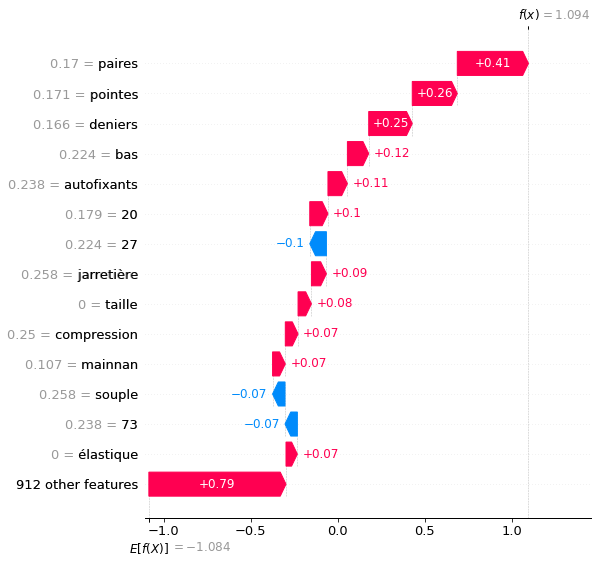

In [25]:
max_display = 15
# For the predicted class
c = predicted[i]
print(f'Explanations for product {i} with description:\n \"{X_test[i]}\"\n predicted class {c} ({familles[c]}):')
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[c], shap_values[c].reshape(-1), X_test_array.reshape(-1),
                                       feature_names=vectorizer.get_feature_names(), max_display=max_display)

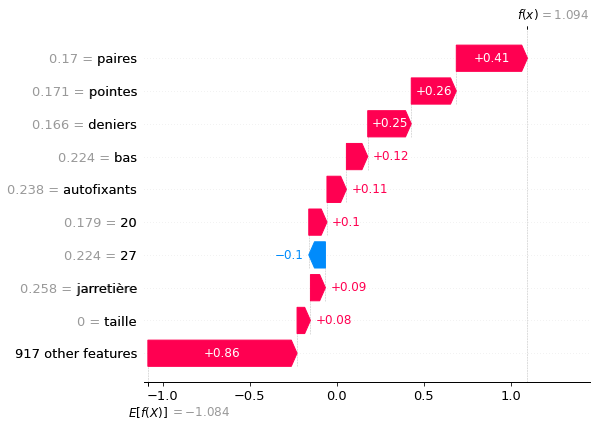

In [26]:
# with some trick inspired from: https://github.com/slundberg/shap/issues/1420#issuecomment-715190610
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        

shap_object = ShapObject(base_values = explainer.expected_value[c],
                         values = shap_values[c].reshape(-1),
                         feature_names = vectorizer.get_feature_names(),
                         data = X_test_array.reshape(-1))

shap.waterfall_plot(shap_object)